In [1]:
import random
import math
from math import sqrt, pi
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
class enclosureNGon:
    def __init__(self, n):
        self.n = n
        self.dtheta = 2 * pi / n
        
        theta = np.linspace(0, 2 * pi * (1.01), num = int(n * 1.01 * (10 ** 3)))
        stairs = (np.divide(theta, self.dtheta)).astype(int)
        thetaPlug = np.multiply(stairs, self.dtheta)
        
        self.sinStairs = np.sin(thetaPlug)
        self.cosStairs = np.cos(thetaPlug)
        
        self.cosUnit = np.multiply(normCentDat(numInt(theta, self.sinStairs)), -1)
        self.sinUnit = normCentDat(numInt(theta, self.cosStairs))
        self.thetaKey = theta
    
    def sin(self, angle):
        return(self.sinUnit[np.argmin(np.abs(np.subtract(self.thetaKey, angle % (2 * pi))))])
    
    def cos(self, angle):
        return(self.cosUnit[np.argmin(np.abs(np.subtract(self.thetaKey, angle % (2 * pi))))])
    
def numInt(indep, dep):
    step = indep[2] - indep[1]
    outp = [0]
    
    for ite in range(len(dep) - 1):
        outp.append(outp[ite] + (step * dep[ite]))
    
    return(outp)

def normCentDat(dat):
    datCent = np.subtract(dat, 0.5 * (max(dat) + min(dat)))
    return(np.divide(datCent, max(datCent)))

In [3]:
class enclosure:
    def __init__(self, sides, height, scaling):
        self.sides = sides
        self.zlim = height / 2.0
        
        if(sides > 0):
            poly = enclosureNGon(sides)
            self.nGon = poly
            
            self.sinAna = np.multiply(0.5 * scaling, poly.sinUnit)
            self.cosAna = np.multiply(0.5 * scaling, poly.cosUnit)
            self.thetaKey = poly.thetaKey
        else:
            theta = np.linspace(0, 2 * pi, num = (10 ** 4))
            self.nGon = None
            
            self.sinAna = np.multiply(0.5 * scaling, np.sin(theta))
            self.cosAna = np.multiply(0.5 * scaling, np.cos(theta))
            self.thetaKey = theta
            
    def sin(self, angle):
        return(self.sinAna[np.argmin(np.abs(np.subtract(self.thetaKey, angle % (2 * pi))))])
    
    def cos(self, angle):
        return(self.cosAna[np.argmin(np.abs(np.subtract(self.thetaKey, angle % (2 * pi))))])

1.5112924859375325


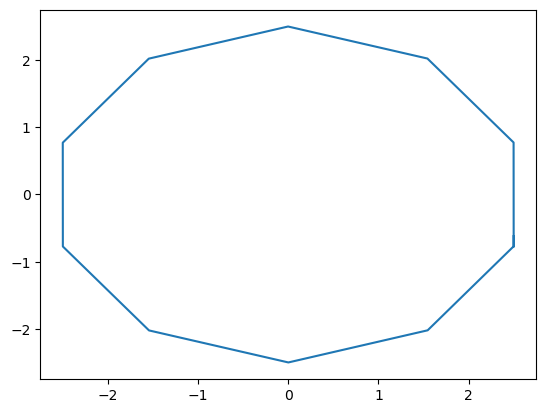

In [4]:
enc = enclosure(10, 1, 5)
plt.plot(enc.cosAna, enc.sinAna)
print(enc.sin(1))